# An Introduction to GRASS GIS for Tangible Landscape

***Caitlin Haedrich, Pratikshya Regmi, Anna Petrasova and Helena Mitasova***

*Center for Geospatial Analytics at NC State University*

In this notebook, we will become familiar with the GRASS working environment and toolsets. By the end of this notebook, you will have experience with:

* [Creating a new GRASS project](#2.-Create-a-New-Project)
* [Importing data](#4.-Import-Data)
* [Working with GRASS Tools](#5.-GRASS-GIS-Tools) and [the Python API](#6.-GRASS-Python-API)
* [Visualizing data](#7.-Data-Visualization-with-grass.jupyter)

Let's dive in!


***

## 1. Import Python Packages

Import the Python standard libraries we need.

In [1]:
import subprocess
import sys
from pathlib import Path

We are going to import the GRASS GIS Python API (`grass.script`) and the GRASS GIS Jupyter package (`grass.jupyter`), but first, we'll need to ask `grass` to check it's `--config` to see where the python packages are then add them to the system path before we can import them. This command is slightly different for each operating system.

We use `subprocess.check_output` to find the path and `sys.path.append` to add it to the path.

In [2]:
sys.path.append(
    subprocess.check_output(["grass", "--config", "python_path"], text=True).strip()
)

And now we can import the GRASS python packages!

In [3]:
# Import the GRASS GIS packages we need.
import grass.script as gs
import grass.jupyter as gj

***

## 2. Create a New Project

Projects are defined by a Coordinate Reference System (CRS). We can set the CRS from a georeferenced file (such as a Geotiff) or an EPSG string. Here, we use [EPSG 3358](https://epsg.io/3358), a projection for NC in meters.

In [10]:
!grass -e -c EPSG:3358 $HOME/csdms-grass-2025/nc-swine

Creating new GRASS GIS location <nc-swine>...


In [ ]:
# gs.create_project("nc-swine", epsg=3358, overwrite=True)

We could also create a project from a georeferenced file, such as `lagoons.gpkg` which we will use later in this workshop.

In [ ]:
# gs.create_project("nc-swine", file=lagoons.gpkg, overwrite=True)` #fix

***

## 3. Start GRASS Session

In [4]:
gj.init("./nc-swine/PERMANENT");

We've launched GRASS GIS now! We can access GRASS GIS commands using the command line interface (with the `!` line magic):

In [12]:
!g.version

GRASS 8.3.1 (2023)


In [13]:
!g.list type=all

In [5]:
!g.region -p

projection: 99 (NAD83(HARN) / North Carolina)
zone:       0
datum:      nad83harn
ellipsoid:  grs80
north:      133940
south:      124940
west:       701050
east:       710310
nsres:      10
ewres:      10
rows:       900
cols:       926
cells:      833400




---


<a name="import"></a>
## 4. Import Data

In [15]:
!v.import input="./lagoons.gpkg" output="lagoons"

	- 'VirtualXPath'	[XML Path Language - XPath]
	- 'VirtualXPath'	[XML Path Language - XPath]
Check if OGR layer <lagoons> contains polygons...
   0   3   6   9  12  16  19  22  25  29  32  35  38  41  45  48  51  54  58  61  64  67  70  74  77  80  83  87  90  93  96 100
Creating attribute table for layer <lagoons>...
Column name <cat> renamed to <cat_>
Importing 31 features (OGR layer <lagoons>)...
   0   3   6   9  12  16  19  22  25  29  32  35  38  41  45  48  51  54  58  61  64  67  70  74  77  80  83  87  90  93  96 100
-----------------------------------------------------
Registering primitives...
-----------------------------------------------------
Cleaning polygons
-----------------------------------------------------
Breaking polygons...
Breaking polygons (pass 1: select break points)...
   3   6   9  12  16  19  22  25  29  32  35  38  41  45  48  51  54  58  61  64  67  70  74  77  80  83  87  90  93  96 100
Breaking polygons (pass 2: break at selected points)...
   3   6  

In [7]:
!g.region -a vector="lagoons" res=10

In [8]:
!g.region grow=200 -p

projection: 99 (NAD83(HARN) / North Carolina)
zone:       0
datum:      nad83harn
ellipsoid:  grs80
north:      133940
south:      124940
west:       701050
east:       710310
nsres:      10
ewres:      10
rows:       900
cols:       926
cells:      833400


In [9]:
!g.list type=all

elevation
lagoons


We're going to import a digital elevation model (DEM), we will use a GRASS addon [r.in.usgs](https://grass.osgeo.org/grass-devel/manuals/addons/r.in.usgs.html), which uses [TNM Access](https://apps.nationalmap.gov/tnmaccess/) REST API to access USGS data. First install the addon:

In [19]:
!g.extension r.in.usgs

Fetching <r.in.usgs> from <https://github.com/OSGeo/grass-addons/> (be
patient)...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 15 (delta 0), reused 0 (delta 0), pack-reused 8 (from 3)
Receiving objects: 100% (15/15), 20.71 KiB | 20.71 MiB/s, done.
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 8 (delta 0), reused 0 (delta 0), pack-reused 4 (from 2)
Receiving objects: 100% (8/8), 239.49 KiB | 3.93 MiB/s, done.
Already on 'grass8'
Your branch is up to date with 'origin/grass8'.
Compiling...
Installing...
Updating extensions metadata file...
Updating extension modules metadata file...
Installation of <r.in.usgs> successfully finished


Download and reproject a 1/9 arc-second DEM (approx 3-m resolution):

In [20]:
!r.in.usgs product="ned" ned_dataset="ned19sec" output_name="elevation"

The default resampling method for product ned is bilinear
Assuming current location as input
Input parameters: '+proj=lcc +lat_0=33.75 +lon_0=-79
+lat_1=36.1666666666667 +lat_2=34.3333333333333 +x_0=609601.22 +y_0=0
+ellps=GRS80 +units=m +no_defs +type=crs'
Output parameters: '+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs'
Assuming current location as input
Input parameters: '+proj=lcc +lat_0=33.75 +lon_0=-79
+lat_1=36.1666666666667 +lat_2=34.3333333333333 +x_0=609601.22 +y_0=0
+ellps=GRS80 +units=m +no_defs +type=crs'
Output parameters: '+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs'
TNM API Query URL:
https://tnmaccess.nationalmap.gov/api/v1/products?datasets=National+Elevation+Dataset+%28NED%29+1%2F9+arc-second&bbox=-77.99967145,34.87213752,-77.89729373,34.95238335&prodFormats=IMG%2CGeoTIFF
USGS file(s) to download:
-------------------------
Total download size:	413.82 MB
Tile count:	2
USGS SRS:	wgs84
USGS tile titles:
USGS NED ned19_n35x00_w078x00_nc_statewide_2003 1/9 arc-se

<details>

<summary>Alternative Import Method</summary>

### Download with wget and import with `r.import`

First, download and unzip with bash.

```bash
%%bash
wget https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/19/IMG/ned19_n35x00_w078x00_nc_statewide_2003.zip
unzip ned19_n35x00_w078x00_nc_statewide_2003.zip
```

We'll import our elevation model using [`r.import`](https://grass.osgeo.org/grass-devel/manuals/r.import.html) and create a raster layer called "elevation". The `r.import` tool will reproject the data to the project CRS (thereby avoiding any future CRS mismatches - nice!). We also set it to only import the area within the computational region and to resample it using bilinear interpolation to the resolution of the computational region.

```bash
!r.import input="ned19_n35x00_w078x00_nc_statewide_2003.img" output="elevation" resample="bilinear" extent="region"
```

</details>

In [21]:
!g.list type=all

elevation
lagoons


In [10]:
!r.in.wms url="https://imagery.nationalmap.gov/arcgis/services/USGSNAIPPlus/ImageServer/WMSServer" out="ortho" layer="USGSNAIPPlus"

ERROR: Unable to load GDAL Python bindings (requires package 'python-gdal'
       being installed)


***

## 5. GRASS GIS Tools

GRASS functionality is available through tools (also called modules). There are over 500 different tools in the core distribution and over 300 addon tools or extensions that can be used to prepare and analyze data.

Tools respect the following naming conventions:

Prefix | Function | Example
------ | -------- | -------
r.* | raster processing | r.mapcalc: map algebra
v.*	| vector processing	| v.clean: topological cleaning
i.*	| imagery processing | i.segment: object recognition
db.* | database management | db.select: select values from table
r3.* | 3D raster processing | r3.stats: 3D raster statistics
t.* | temporal data processing | t.rast.aggregate: temporal aggregation
g.* | general data management | g.rename: renames map
d.* | display | d.rast: display raster map

Note also that some tools have multiple dots in their names. For example, tools staring with v.net.* deal with vector network analysis and r.in.* tools import raster data into GRASS GIS spatial database.

Check out the _brand new_ [manual page](https://grass.osgeo.org/grass-devel/manuals/full_index.html) to browse tools.

There is also a tool for finding other tools:

In [24]:
!g.search.modules keyword=zonal


r.statistics
    keywords: raster,statistics,zonal statistics
    description: Calculates category or object oriented statistics.

r.stats.quantile
    keywords: raster,statistics,zonal statistics,percentile,quantile
    description: Compute category quantiles using two passes.

r.stats.zonal
    keywords: raster,statistics,zonal statistics
    description: Calculates category or object oriented statistics
                 (accumulator-based statistics).

r.univar
    keywords: raster,statistics,univariate statistics,zonal statistics,parallel
    description: Calculates univariate statistics from the non-null cells of a
                 raster map. Statistics include number of cells counted,
                 minimum and maximum cell values, range, arithmetic mean,
                 population variance, standard deviation, coefficient of
                 variation, and sum.

v.rast.stats
    keywords: vector,statistics,raster,univariate statistics,zonal
              statistics,sampling

Here is how to get all options and flags of a GRASS tool through command line:

In [25]:
!r.univar --help

Calculates univariate statistics from the non-null cells of a raster map.

Usage:
 r.univar [-getr] map=name[,name,...] [zones=name] [output=name]
   [percentile=value[,value,...]] [nprocs=value] [separator=character]
   [--overwrite] [--help] [--verbose] [--quiet] [--ui]

Flags:
  -g   Print the stats in shell script style
  -e   Calculate extended statistics
  -t   Table output format instead of standard output format
  -r   Use the native resolution and extent of the raster map, instead of the current region

Parameters:
         map   Name of raster map(s)
       zones   Raster map used for zoning, must be of type CELL
      output   Name for output file (if omitted or "-" output to stdout)
  percentile   Percentile to calculate (requires extended statistics flag)
               options: 0-100
               default: 90
      nprocs   Number of threads for parallel computing
               default: 1
   separator   Field separator
               default: pipe


***

## 6. GRASS Python API

There are two Python APIs for accessing GRASS GIS tools' functionality - [GRASS GIS Python Scripting Library](https://grass.osgeo.org/grass-stable/manuals/libpython/script_intro.html) and [PyGRASS](https://grass.osgeo.org/grass-stable/manuals/libpython/pygrass_index.html).
PyGRASS is advantageous for more advanced workflows and low level tasks. Here, we will be using the Python Scripting Library (`import grass.script as gs`)
as it is simpler and more straightforward to use.
 

The GRASS GIS Python Scripting Library provides functions to call GRASS tools within scripts as subprocesses. The most often used functions include:

 * [run_command()](https://grass.osgeo.org/grass-stable/manuals/libpython/script.html#script.core.run_command): used with modules which output raster/vector data where text output is not expected
 * [read_command()](https://grass.osgeo.org/grass-stable/manuals/libpython/script.html#script.core.read_command): used when we are interested in text output
 * [parse_command()](https://grass.osgeo.org/grass-stable/manuals/libpython/script.html#script.core.parse_command): used with modules producing text output as key=value pair
 * [write_command()](https://grass.osgeo.org/grass-stable/manuals/libpython/script.html#script.core.write_command): for modules expecting text input from either standard input or file

Here's an example of the Python API in action:

In [26]:
gs.run_command("g.list", type="raster")

elevation


**Try it yourself!**

_The `r.info map=elevation` command will print information about the elevation raster. Execute `r.info` in using the Python API._

<details>
    <summary>👉 <b>click to see solution</b></summary>
    
```python
gs.read_command("r.info", map="elevation")
```
</details>

The Python API also provides several wrapper functions for often called modules. The list of convenient wrapper functions with examples includes:

 * Raster metadata using [raster_info()](https://grass.osgeo.org/grass-stable/manuals/libpython/script.html#script.raster.raster_info): `gs.raster_info('dsm')`
 * Vector metadata using [vector_info()](https://grass.osgeo.org/grass-stable/manuals/libpython/script.html#script.vector.vector_info): `gs.vector_info('roads')`
 * List raster data in current location using [list_grouped()](https://grass.osgeo.org/grass-stable/manuals/libpython/script.html#script.core.list_grouped): `gs.list_grouped(type=['raster'])`
 * Get current computational region using [region()](https://grass.osgeo.org/grass-stable/manuals/libpython/script.html#script.core.region): `gs.region()`
 * Run raster algebra using [mapcalc()](https://grass.osgeo.org/grass-stable/manuals/libpython/script.html#script.raster.mapcalc): `gs.mapcalc()`

_Try using `gs.vector_info` to print information about the "lagoons" vector layer._

<details>
    <summary>👉 <b>click to see solution</b></summary>
    
```python
gs.vector_info("lagoons")
```
</details>

***

## 7. Data Visualization with `grass.jupyter`

`grass.jupyter.Map()` creates and displays GRASS maps as PNG images. `gj.Map()` accepts any GRASS display module as a method by replacing the "." with "\_" in the module name. For example:

In [ ]:
example = gj.Map()
example.d_rast(map="elevation") # d.rast map=ortho
# example.d_rast(map="viewshed")
example.d_barscale(bgcolor="none") # d.barscale
# example.d_legend() #add this
example.show()

To display the image, we call the `show()` method. You can also save the image with the `save()` method.

`grass.jupyter.InteractiveMap()` creates leaflet maps that are interactive. They can also be saved as html with the `save()` method and embedded on a website or shared.


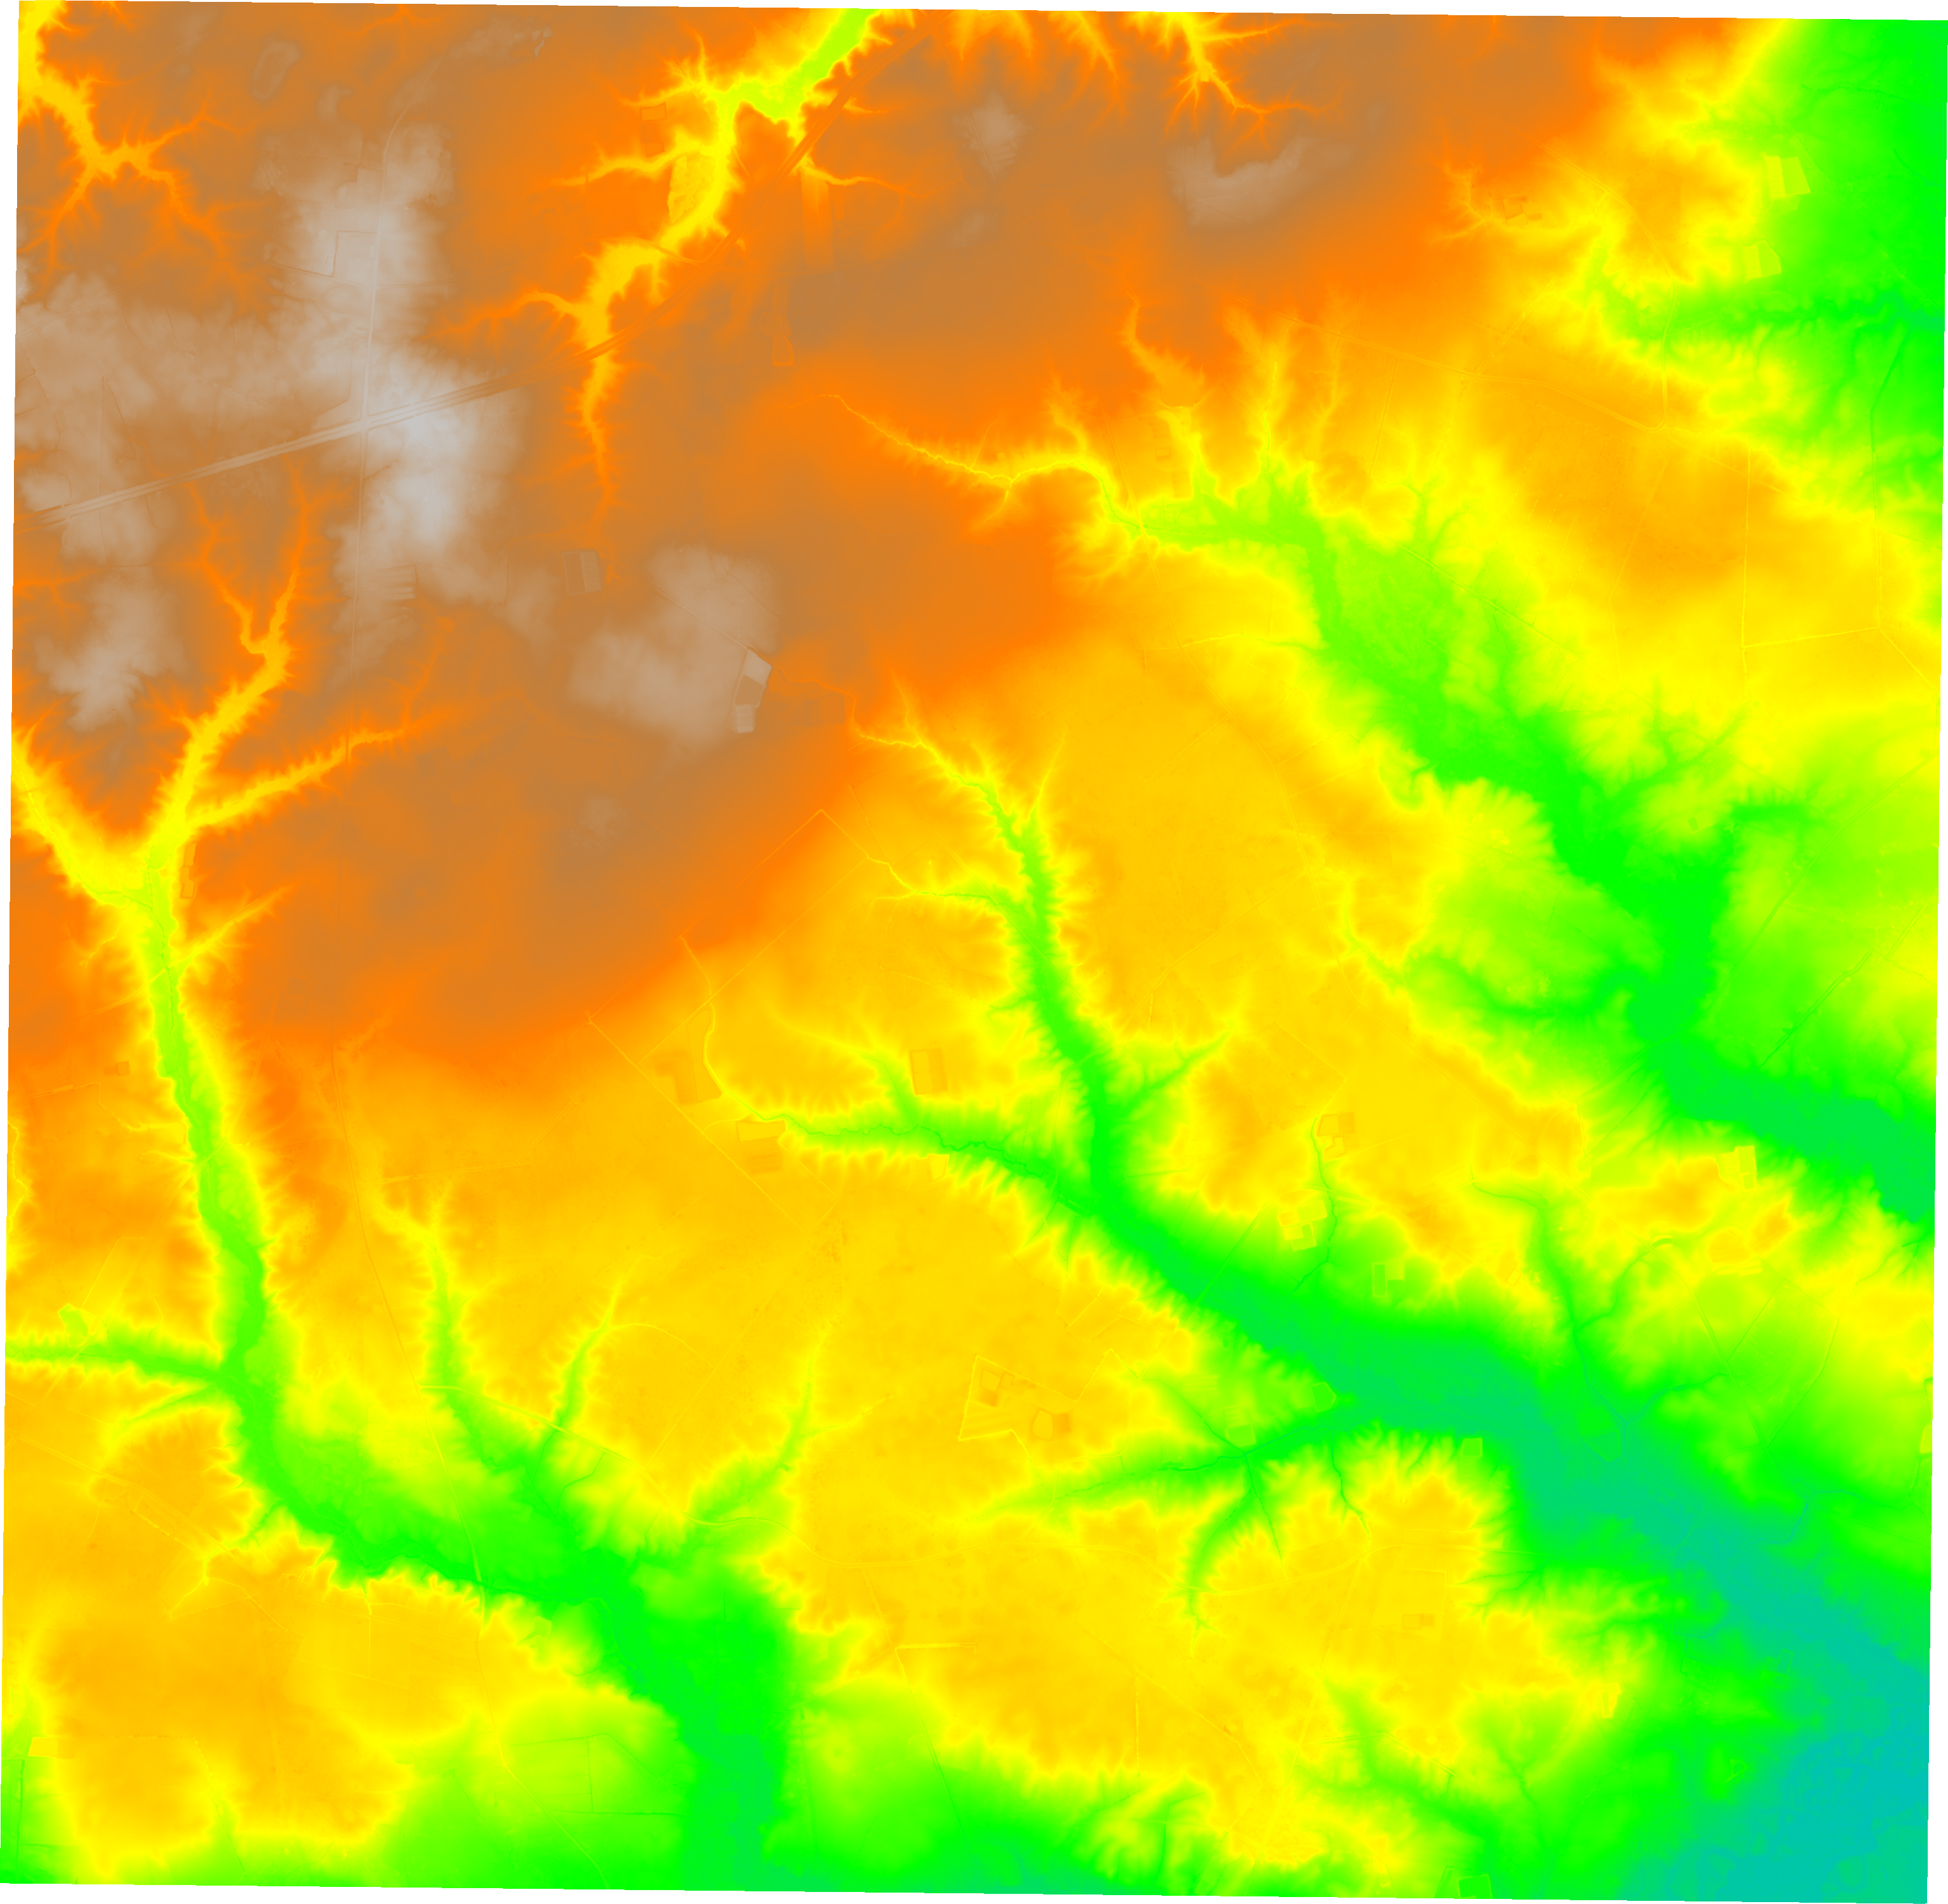

In [20]:
map = gj.InteractiveMap()
map.add_raster("elevation", opacity=0.6)
map.add_vector("lagoons")
map.add_layer_control()
map.show()